# 1. 데이터 로더(Data Loader)
* 데이터의 양이 많을 때 배치 단위로 학습하는 방법

<center><img src='https://i.imgur.com/t83RUtL.png' width='700'></center>

# 2. 손글씨 인식 모델 만들기

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
digits = load_digits()

x_data = digits['data']
y_data = digits['target']

print(x_data.shape)
print(y_data.shape)

(1797, 64)
(1797,)


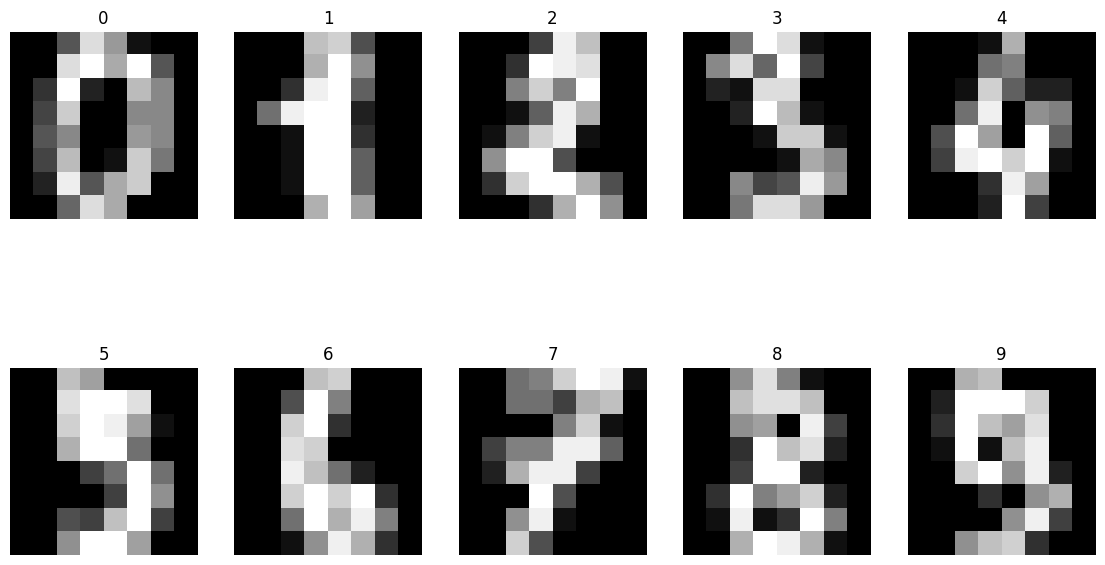

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(x_data[i].reshape((8, 8)), cmap='gray')
  ax.set_title(y_data[i])
  ax.axis('off')

In [5]:
x_data = torch.FloatTensor(x_data)
y_data = torch.LongTensor(y_data)

print(x_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=2024)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


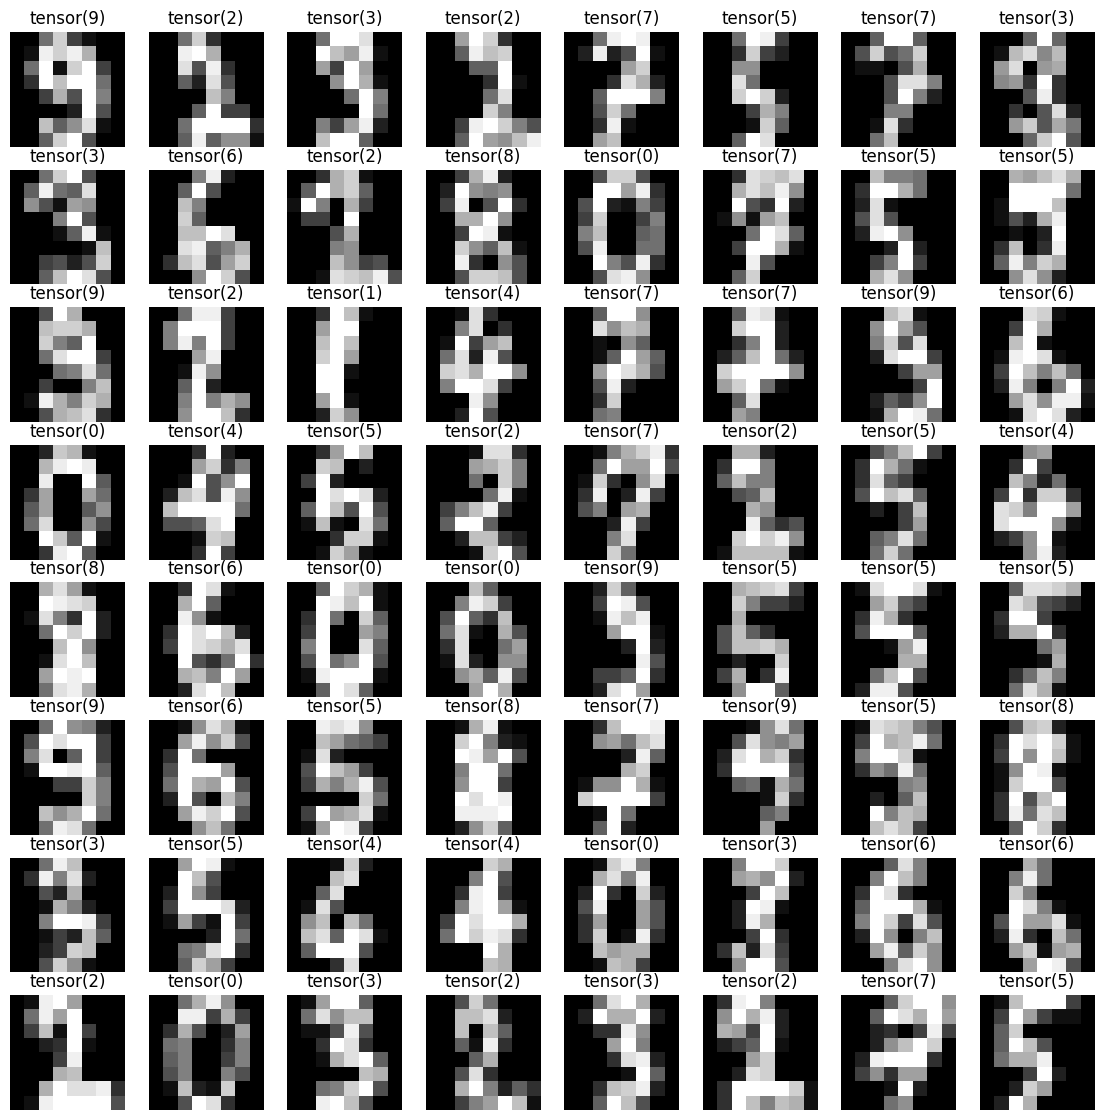

In [7]:
loader = torch.utils.data.DataLoader(
    dataset = list(zip(x_train, y_train)),
    batch_size=64,
    shuffle = True,
    #drop_last=False
)

imgs, labels = next(iter(loader))
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
  ax.imshow(img.reshape((8, 8)), cmap='gray')
  ax.set_title(str(label))
  ax.axis('off')

In [8]:
model = nn.Sequential(
    nn.Linear(64, 10)
)

optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 50
for epoch in range(epochs + 1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in loader:
        # print(x_batch)
        # print(y_batch)
        y_pred = model(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)
    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/50 Loss: 1.494475 Accuracy: 62.84%
Epoch    1/50 Loss: 0.279416 Accuracy: 91.96%
Epoch    2/50 Loss: 0.179017 Accuracy: 93.67%
Epoch    3/50 Loss: 0.123866 Accuracy: 96.20%
Epoch    4/50 Loss: 0.107974 Accuracy: 96.49%
Epoch    5/50 Loss: 0.097644 Accuracy: 97.21%
Epoch    6/50 Loss: 0.091236 Accuracy: 96.91%
Epoch    7/50 Loss: 0.080531 Accuracy: 97.08%
Epoch    8/50 Loss: 0.072634 Accuracy: 97.76%
Epoch    9/50 Loss: 0.053263 Accuracy: 98.44%
Epoch   10/50 Loss: 0.059589 Accuracy: 98.71%
Epoch   11/50 Loss: 0.043827 Accuracy: 98.85%
Epoch   12/50 Loss: 0.039209 Accuracy: 99.12%
Epoch   13/50 Loss: 0.040535 Accuracy: 99.31%
Epoch   14/50 Loss: 0.036153 Accuracy: 99.32%
Epoch   15/50 Loss: 0.032900 Accuracy: 99.59%
Epoch   16/50 Loss: 0.034742 Accuracy: 99.17%
Epoch   17/50 Loss: 0.030416 Accuracy: 99.59%
Epoch   18/50 Loss: 0.029918 Accuracy: 99.59%
Epoch   19/50 Loss: 0.023218 Accuracy: 99.80%
Epoch   20/50 Loss: 0.024000 Accuracy: 99.52%
Epoch   21/50 Loss: 0.023548 Accur

tensor(7)


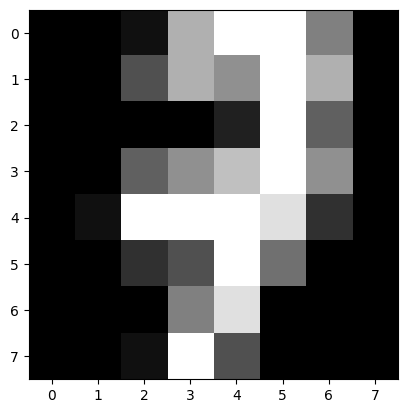

In [9]:
plt.imshow(x_test[10].reshape((8, 8)), cmap='gray')
print(y_test[10])

In [10]:
y_pred = model(x_test)
y_pred[10]

tensor([ -5.4721,  -2.1754, -13.5906,  -3.6023,  -1.1777,  -6.7751, -13.5216,
         12.8942,  -0.3088,   2.5284], grad_fn=<SelectBackward0>)

In [11]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[10]

tensor([1.0558e-08, 2.8531e-07, 3.1460e-12, 6.8487e-08, 7.7378e-07, 2.8688e-09,
        3.3707e-12, 9.9997e-01, 1.8448e-06, 3.1490e-05],
       grad_fn=<SelectBackward0>)

In [12]:
for i in range(10):
  print(f'숫자 {i}일 확률: {y_prob[10][i]:.2f}')

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 0.00
숫자 6일 확률: 0.00
숫자 7일 확률: 1.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00


In [13]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy: .2f}%입니다.')

테스트 정확도는  95.56%입니다.
